In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
import numpy as np

# import warnings
# warnings.filterwarnings('ignore')

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

In [13]:
import joblib

# Muat data yang berisi label_encoder Anda
try:
    data = joblib.load('/kaggle/input/label-data/label_data.joblib')
    label_encoder = data['label_encoder']

    # Dapatkan daftar kelas/emosi sesuai urutannya.
    # Atribut .classes_ akan memberikan urutan yang benar.
    emotion_classes = label_encoder.classes_

    # Cetak untuk verifikasi
    print("✅ Urutan Kelas Emosi yang Benar (Sesuai Indeks):")
    for index, emotion in enumerate(emotion_classes):
        print(f"   Indeks {index}: {emotion}")
        
    print("\n💡 Pastikan file 'labels.txt' Anda memiliki urutan persis seperti ini,")
    print("   dimulai dari baris pertama untuk Indeks 0.")

except FileNotFoundError:
    print("❌ Error: File 'label_data.joblib' tidak ditemukan.")

✅ Urutan Kelas Emosi yang Benar (Sesuai Indeks):
   Indeks 0: anger
   Indeks 1: disgust
   Indeks 2: fear
   Indeks 3: happiness
   Indeks 4: neutral
   Indeks 5: sadness

💡 Pastikan file 'labels.txt' Anda memiliki urutan persis seperti ini,
   dimulai dari baris pertama untuk Indeks 0.


In [2]:
ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [3]:
ravdess_directory_list = os.listdir(ravdess)

file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)

print(ravdess_df.Emotion.value_counts())

Emotion
neutral     288
surprise    192
disgust     192
fear        192
sad         192
happy       192
angry       192
Name: count, dtype: int64


/tmp/ipykernel_36/1850284038.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',


In [4]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotion.value_counts())


Emotion
fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: count, dtype: int64


In [5]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Savee_df = Savee_df[Savee_df['Emotion'] != 'neutral']

print(Savee_df.Emotion.value_counts())

Emotion
happy       60
fear        60
disgust     60
angry       60
surprise    60
sad         60
Name: count, dtype: int64


In [6]:
# creating Dataframe using all the 4 dataframes we created so far.
df = pd.concat([ravdess_df, Tess_df, Savee_df], axis = 0)
df.head()

,Emotion,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [7]:
df = df[df['Emotion'] != 'surprise']

df['Emotion'].value_counts()

Emotion
neutral    688
disgust    652
fear       652
sad        652
happy      652
angry      652
Name: count, dtype: int64

In [8]:
df.shape

(3948, 2)

In [9]:
!pip install noisereduce

In [10]:
import librosa
import scipy.signal
from tqdm import tqdm
import noisereduce as nr

# Target sample rate dan durasi
TARGET_SR = 44100
TARGET_DURATION = 3  # detik
TARGET_LENGTH = TARGET_SR * TARGET_DURATION

def preprocess_audio(path, sr=TARGET_SR):
    try:
        # Load dan resample audio
        audio, _ = librosa.load(path, sr=sr)

        # Silence trimming
        audio_trimmed, _ = librosa.effects.trim(audio)

        # Denoising
        audio_denoised = nr.reduce_noise(
            y=audio_trimmed,
            sr=sr,
            stationary=True,
            prop_decrease=0.75,
            n_fft=1024,
            win_length=1024,
            hop_length=256
        )

        # Zero-padding (atau cropping jika terlalu panjang)
        if len(audio_denoised) < TARGET_LENGTH:
            padded = np.pad(audio_denoised, (0, TARGET_LENGTH - len(audio_denoised)))
        else:
            padded = audio_denoised[:TARGET_LENGTH]

        return padded
    except Exception as e:
        print(f"Error processing {path}: {e}")
        return None

In [11]:
from sklearn.model_selection import train_test_split

df_train_temp, df_test = train_test_split(
    df,
    test_size=0.2,
    stratify=df['Emotion'],
    random_state=42
)

df_train, df_val = train_test_split(
    df_train_temp,
    test_size=0.125,
    stratify=df_train_temp['Emotion'],
    random_state=42
)

print(f"Jumlah data latih: {len(df_train)}")
print(f"Jumlah data uji: {len(df_test)}")
print(f"Jumlah data validasi: {len(df_val)}")

Jumlah data latih: 2763
Jumlah data uji: 790
Jumlah data validasi: 395


In [12]:
# 2. Preprocessing untuk semua data
def preprocess_split(df_split):
    preprocessed_audios = []
    labels = []
    for idx, row in tqdm(df_split.iterrows(), total=len(df_split), desc="Preprocessing"):
        audio = preprocess_audio(row['Path'])
        if audio is not None:
            preprocessed_audios.append(audio)
            labels.append(row['Emotion'])
    return np.array(preprocessed_audios), np.array(labels)

X_train, y_train = preprocess_split(df_train)
X_val, y_val = preprocess_split(df_val)
X_test, y_test = preprocess_split(df_test)

Preprocessing:  71%|███████   | 1953/2763 [03:10<01:19, 10.23it/s]


KeyboardInterrupt: 

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_val.shape)

In [ ]:
def extract_log_mel(audio, sr=44100, n_fft=2048, hop_length=512, n_mels=128):
    mel_spectrogram = librosa.feature.melspectrogram(
        y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, 
        n_mels=n_mels, window='hann'
    )
    log_mel = librosa.power_to_db(mel_spectrogram)
    # Normalisasi per-sample
    mean = np.mean(log_mel)
    std = np.std(log_mel)
    return (log_mel - mean) / std

In [ ]:
print("Ekstraksi fitur...")
X_train_spec = np.array([extract_log_mel(audio) for audio in tqdm(X_train, desc="Train")])
X_val_spec = np.array([extract_log_mel(audio) for audio in tqdm(X_val, desc="Validation")])
X_test_spec = np.array([extract_log_mel(audio) for audio in tqdm(X_test, desc="Test")])

In [ ]:
X_train_spec = X_train_spec[..., np.newaxis]
X_val_spec = X_val_spec[..., np.newaxis]
X_test_spec = X_test_spec[..., np.newaxis]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_val_cat = to_categorical(y_val_enc)
y_test_cat = to_categorical(y_test_enc)

In [18]:
print("Final shapes:")
print(f"Train: {X_train_spec.shape}, {y_train_cat.shape}")
print(f"Validation: {X_val_spec.shape}, {y_val_cat.shape}")
print(f"Test: {X_test_spec.shape}, {y_test_cat.shape}")

Final shapes:
Train: (2763, 128, 259, 1), (2763, 6)
Validation: (395, 128, 259, 1), (395, 6)
Test: (790, 128, 259, 1), (790, 6)


In [19]:
y_test_cat

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [40]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D,
#                                      Reshape, GlobalAveragePooling2D, Dense, Dropout, TimeDistributed)

# input_shape = (128, 259, 1)
# num_classes = y_train_cat.shape[1]

# inputs = Input(shape=input_shape)

# # mLFLB 1
# x = Conv2D(64, kernel_size=(9, 9), padding='same')(inputs)
# x = ReLU()(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.3)(x)

# # mLFLB 2
# x = Conv2D(64, kernel_size=(7, 7), padding='same')(x)
# x = ReLU()(x)
# x = MaxPooling2D(pool_size=(4, 4))(x)
# x = Dropout(0.3)(x)

# # mLFLB 3
# x = Conv2D(128, kernel_size=(5, 5), padding='same')(x)
# x = ReLU()(x)
# x = MaxPooling2D(pool_size=(4, 4))(x)
# x = Dropout(0.3)(x)

# # mLFLB 4
# x = Conv2D(128, kernel_size=(3, 3), padding='same')(x)
# x = ReLU()(x)
# x = MaxPooling2D(pool_size=(4, 4))(x)
# x = Dropout(0.3)(x)

# x = GlobalAveragePooling2D()(x)  # Convert ke 2D (batch, features)

# # Dense layers sebelum output
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.4)(x)

# # Output layer
# outputs = Dense(num_classes, activation='softmax')(x)    

# # Compile model
# model = Model(inputs, outputs)
# model.compile(
#     loss='categorical_crossentropy',
#     optimizer=Adam(learning_rate=0.0001),
#     metrics=['accuracy']
# )

# model.summary()

In [78]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D,
                                     Reshape, GlobalAveragePooling2D, Dense, Dropout, TimeDistributed)

input_shape = (128, 259, 1)
num_classes = y_train_cat.shape[1]

inputs = Input(shape=input_shape)

# mLFLB 1
x = Conv2D(128, kernel_size=(9, 9), padding='same')(inputs)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# mLFLB 2
x = Conv2D(128, kernel_size=(7, 7), padding='same')(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Dropout(0.3)(x)

# mLFLB 3
x = Conv2D(256, kernel_size=(5, 5), padding='same')(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Dropout(0.3)(x)

# mLFLB 4
x = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Dropout(0.3)(x)

x = GlobalAveragePooling2D()(x)  # Convert ke 2D (batch, features)

# Dense layers sebelum output
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)

# Output layer
outputs = Dense(num_classes, activation='softmax')(x)    

# Compile model
model = Model(inputs, outputs)
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 128, 259, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 128, 259, 128)  │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_66 (ReLU)                 │ (None, 128, 259, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 64, 129, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 64, 129, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 64, 129, 128)   │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_67 (ReLU)                 │ (None, 64, 129, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 16, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 16, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 16, 32, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_68 (ReLU)                 │ (None, 16, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 4, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 4, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 4, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_69 (ReLU)                 │ (None, 4, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 1, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 1, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_18     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945,926 (11.24 MB)

 Trainable params: 2,945,926 (11.24 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Callback untuk menghentikan pelatihan saat overfitting
earlystop_cb = EarlyStopping(
    monitor='val_loss', 
    patience=7, 
    restore_best_weights=True
)

reduce_lr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          
    patience=5,        
    min_lr=1e-6,       
    verbose=1
)

In [80]:
history = model.fit(
    X_train_spec, y_train_cat,
    # validation_split=0.1,
    validation_data=(X_val_spec, y_val_cat),
    epochs=50,
    batch_size=16,
    # batch_size=8,
    callbacks=[earlystop_cb, reduce_lr_cb],
    verbose=1
)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 55s 228ms/step - accuracy: 0.1846 - loss: 1.8080 - val_accuracy: 0.4203 - val_loss: 1.7194 - learning_rate: 1.0000e-04
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.3552 - loss: 1.5646 - val_accuracy: 0.6785 - val_loss: 1.0893 - learning_rate: 1.0000e-04
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.5680 - loss: 1.1259 - val_accuracy: 0.7544 - val_loss: 0.7463 - learning_rate: 1.0000e-04
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.6927 - loss: 0.8460 - val_accuracy: 0.7468 - val_loss: 0.6579 - learning_rate: 1.0000e-04
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.7171 - loss: 0.7392 - val_accuracy: 0.7722 - val_loss: 0.5863 - learning_rate: 1.0000e-04
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.7438 - loss: 0.6644 - val_accuracy: 0.7975 - val_loss: 0.5558 - learning_rate: 1.0000e-04
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 22s 12

In [84]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Prediksi label dari data uji
y_pred = model.predict(X_test_spec)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cat, axis=1)

# Hitung akurasi
acc = accuracy_score(y_true_labels, y_pred_labels)
print(f"Accuracy: {acc:.4f}")

# Buat classification report
target_names = label_encoder.classes_  
print(classification_report(y_true_labels, y_pred_labels, target_names=target_names))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Accuracy: 0.9101
              precision    recall  f1-score   support

       angry       0.93      0.96      0.94       131
     disgust       0.95      0.87      0.91       130
        fear       0.88      0.94      0.91       130
       happy       0.93      0.85      0.89       131
     neutral       0.92      0.93      0.92       138
         sad       0.86      0.91      0.88       130

    accuracy                           0.91       790
   macro avg       0.91      0.91      0.91       790
weighted avg       0.91      0.91      0.91       790



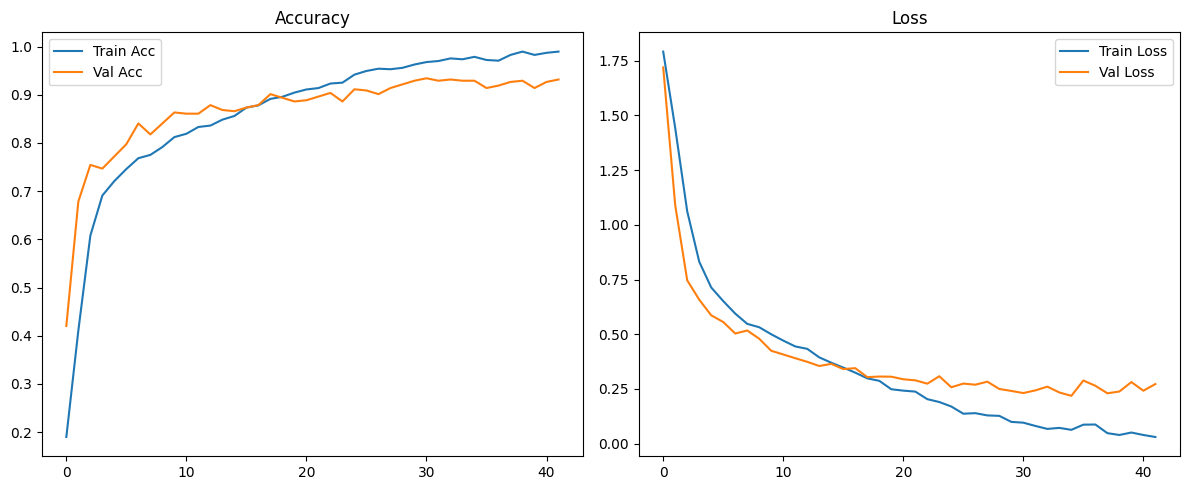

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [2]:
from tensorflow.keras.models import load_model, save_model

# model.save('model_ser_cnn-91.h5')

2025-08-26 20:20:37.402160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756239637.634151      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756239637.700344      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import tensorflow as tf

# Load your H5 model
model = tf.keras.models.load_model('/kaggle/input/model_ser_91/tensorflow2/default/1/model_ser_cnn-91.h5')

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

I0000 00:00:1756239651.509104      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756239651.509906      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Saved artifact at '/tmp/tmpwromrfls'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 259, 1), dtype=tf.float32, name='input_layer_15')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  137477887221136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887215376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887221520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887222864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887223056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887223248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887220944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887225168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887224592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887225936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137477887225

W0000 00:00:1756239654.710590      36 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1756239654.710631      36 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1756239654.718974      36 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
